In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
from sklearn.tree import plot_tree # tree diagram

In [2]:
df = pd.read_csv("./healthcare-dataset-stroke-data.csv",sep=",")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df = df.drop('id',axis=1)

In [4]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [5]:
# Convert Marrital Status, Residence and Gender into 0's and 1's
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
df["gender"] = df["gender"].apply(lambda x: 1 if x=="Male" else 0)

In [6]:
df['gender']=df['gender'].replace('Other','Male')

In [7]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['work_type']= encoder.fit_transform(df['work_type'])
df['smoking_status']= encoder.fit_transform(df['smoking_status'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [9]:
no_stroke = df.loc[df["stroke"]==0]
samp_no_stroke = no_stroke.sample(n=1417)
samp_no_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4268,0,32.0,0,0,1,3,1,110.33,24.000000,3,0
3252,0,26.0,0,0,0,2,0,191.78,24.700000,0,0
313,0,38.0,0,0,1,2,0,79.83,27.900000,3,0
1628,1,69.0,0,1,1,2,0,216.90,29.800000,1,0
549,1,77.0,0,0,1,2,1,193.83,26.500000,2,0
...,...,...,...,...,...,...,...,...,...,...,...
3627,0,53.0,1,0,1,2,0,216.88,31.400000,3,0
432,0,63.0,0,0,1,0,0,79.92,28.893237,3,0
4407,0,34.0,0,0,0,2,1,70.87,55.700000,1,0
4824,0,81.0,0,0,1,2,0,91.82,36.900000,0,0


In [11]:
stroke= df.loc[df["stroke"]==1]
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
244,1,57.0,0,0,1,2,0,84.96,36.700000,0,1
245,0,14.0,0,0,0,4,0,57.93,30.900000,0,1
246,0,75.0,0,0,1,3,0,78.80,29.300000,1,1
247,1,71.0,1,0,1,3,0,87.80,28.893237,0,1


In [12]:
no_stroke = samp_no_stroke
stroke = stroke
df1 = pd.DataFrame(no_stroke)
df2 = pd.DataFrame(stroke)

newdf = df1.append(df2)

In [ ]:
df1

In [ ]:
df2

In [ ]:
newdf

In [13]:
newdf.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int32
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

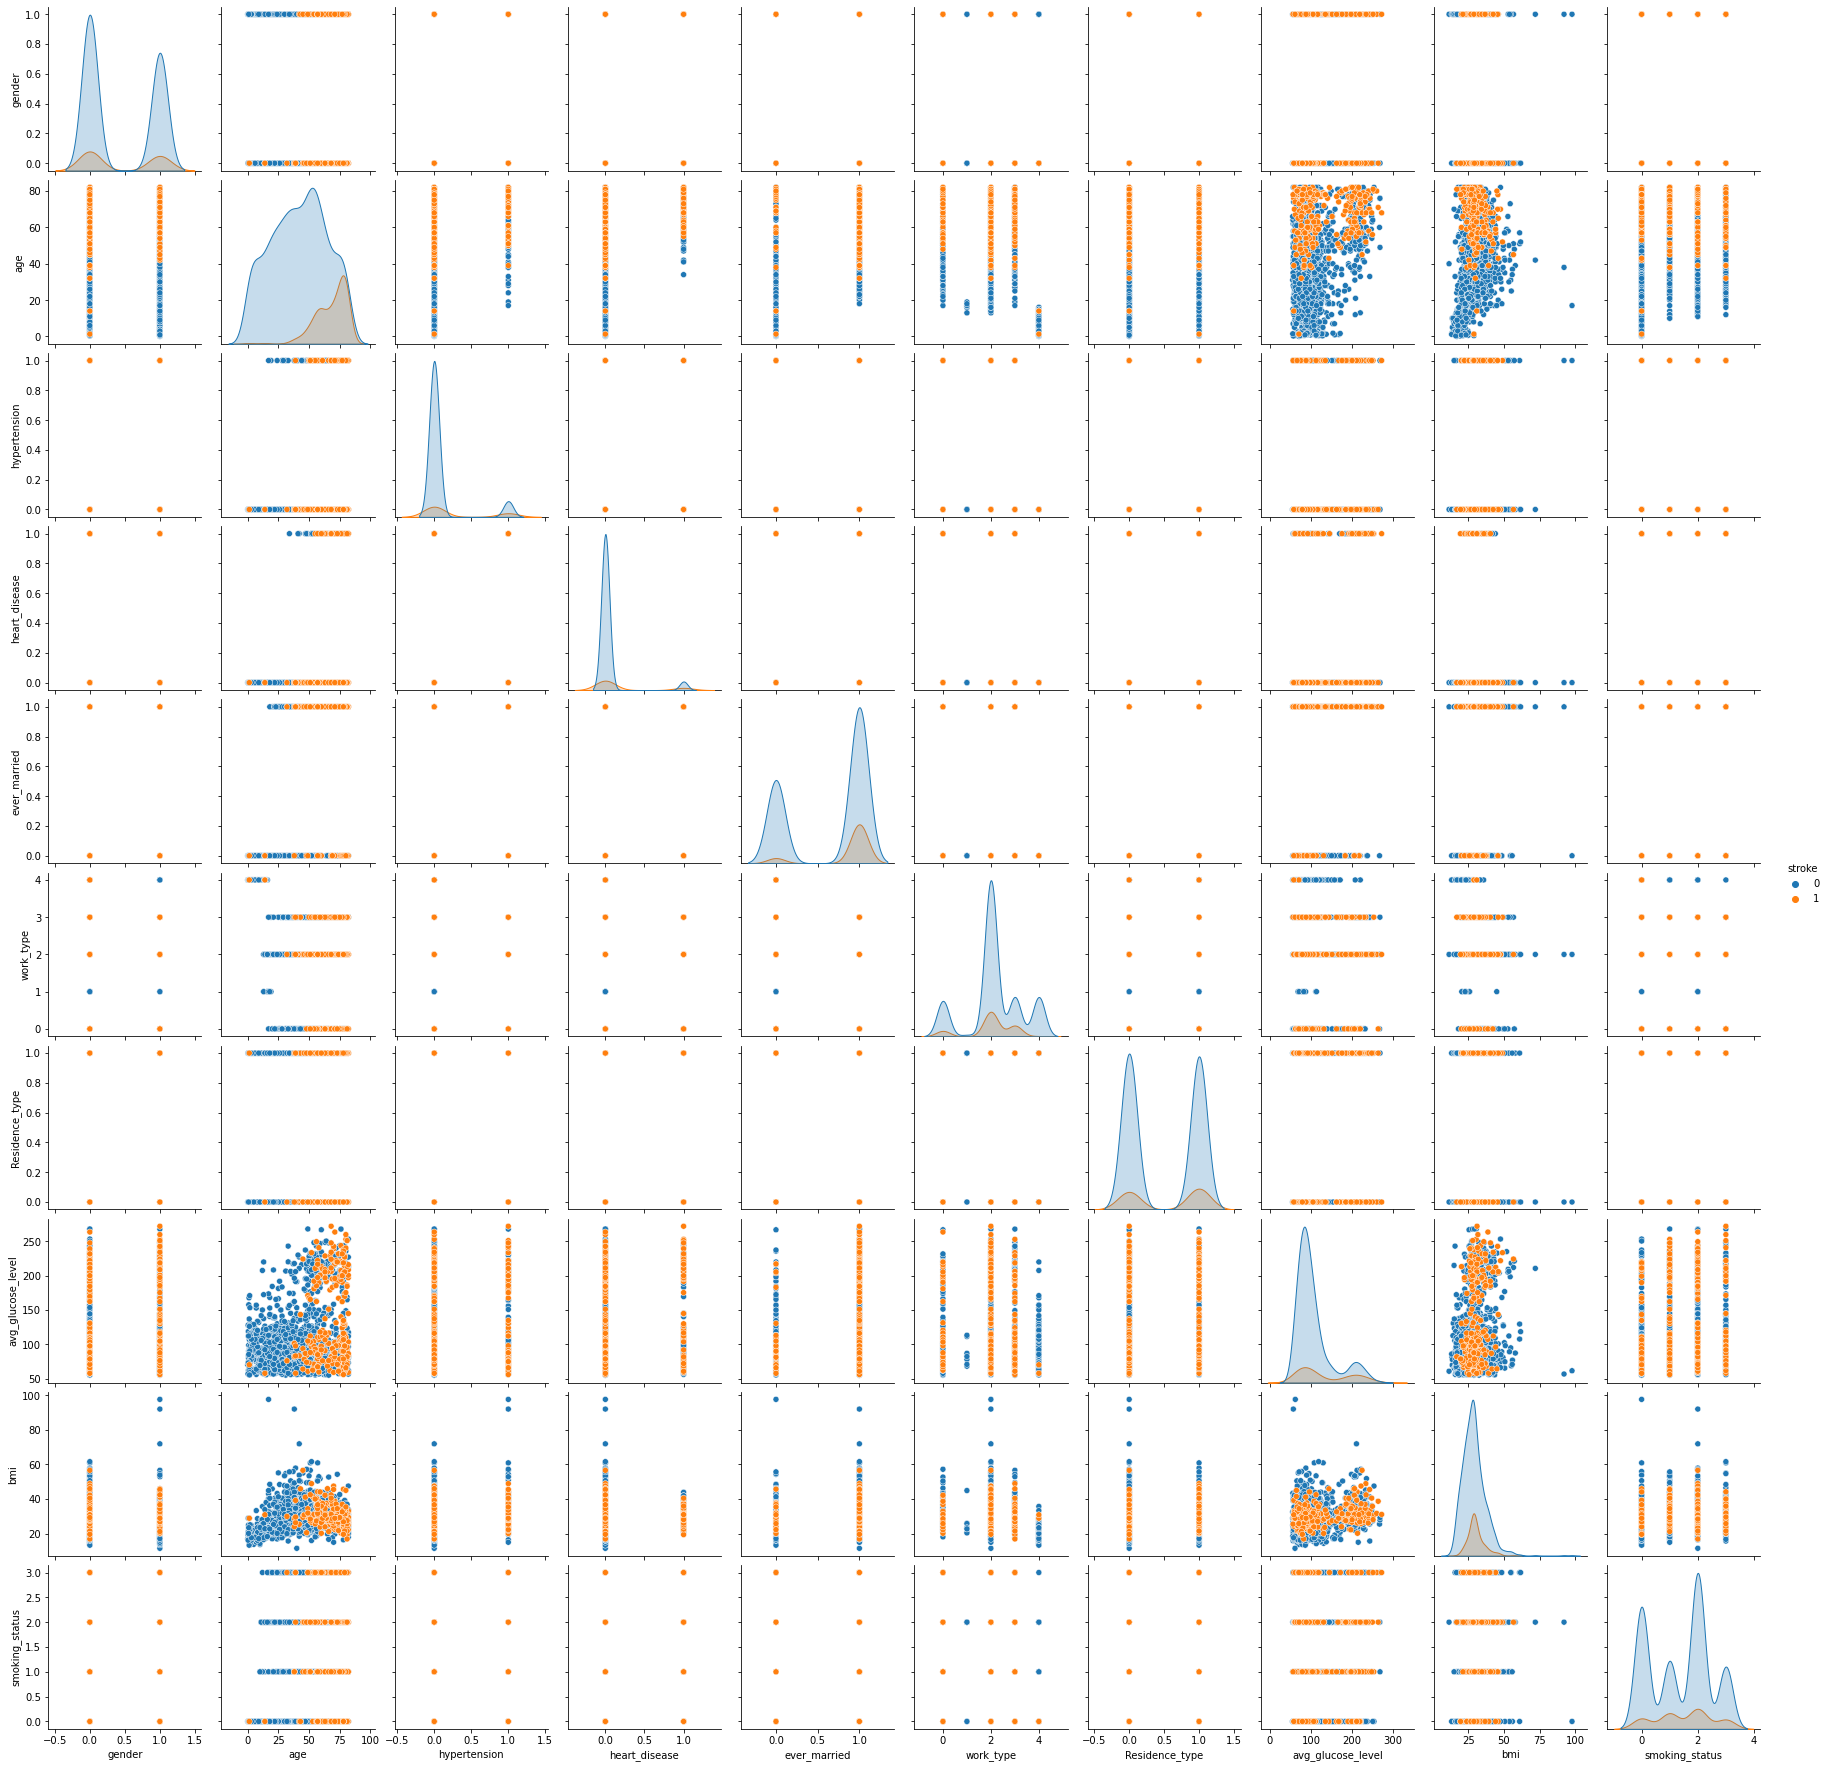

In [26]:
sns.pairplot(data=newdf,hue='stroke')

In [14]:
# Splitting data
from sklearn.model_selection import train_test_split
X = newdf.drop('stroke', axis=1)
y = newdf.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
X_train.shape, X_test.shape

((1249, 10), (417, 10))

In [19]:
# splitting the classes
train = X_train.copy()
train['stroke'] = y_train
stroke = train[(train.stroke == 1)]
not_stroke = train[(train.stroke == 0)]

In [16]:
tree_up = DecisionTreeClassifier(criterion='gini', max_depth=2,
                       random_state=1, splitter='best')
tree_up.fit(X_train,y_train)
pred_up = tree_up.predict(X_test)
#prediction on the known test set
print("Precision: ", metrics.precision_score(y_test,pred_up))
print("Accuracy: ", metrics.accuracy_score(y_test,pred_up))
print("Classification report: ")
print(metrics.classification_report(y_test,pred_up))
print("")
print("Confusion matrix: ")
print(metrics.confusion_matrix(y_test,pred_up))

Precision:  0.0
Accuracy:  0.8729016786570744
Classification report: 
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       364
           1       0.00      0.00      0.00        53

    accuracy                           0.87       417
   macro avg       0.44      0.50      0.47       417
weighted avg       0.76      0.87      0.81       417


Confusion matrix: 
[[364   0]
 [ 53   0]]


C:\Users\Tica\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tica\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tica\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tica\AppData\Roa

In [21]:

y_pred = tree_up.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('The classification report is:\n{:}'.format(classification_report(y_test,y_pred)))

[[364   0]
 [ 53   0]]
The classification report is:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       364
           1       0.00      0.00      0.00        53

    accuracy                           0.87       417
   macro avg       0.44      0.50      0.47       417
weighted avg       0.76      0.87      0.81       417



C:\Users\Tica\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tica\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tica\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: name 'hfont' is not defined

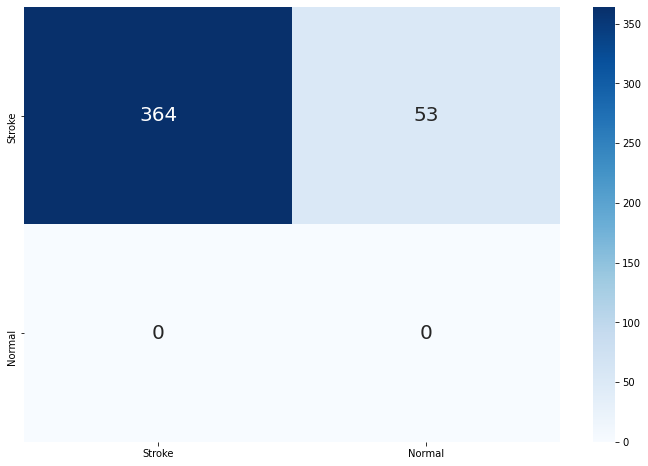

In [25]:
y_pred = tree_up.predict(X_test)
matrix = confusion_matrix(y_pred, y_test)

df_cm = pd.DataFrame(matrix, index = ['Stroke', 'Normal'],
                                columns = ['Stroke', 'Normal'])
plt.figure(figsize = (12,8))
sns.heatmap(df_cm,
                annot=True,
                cmap='Blues',
                fmt='.5g',
                annot_kws={"size": 20}).set_title('Confusion matrix', fontsize = 35, y=1.05, **hfont)
plt.xlabel('Predicted values', fontsize = 20, **hfont)
plt.ylabel('True values', fontsize = 20, **hfont)
plt.show()

In [ ]:
 newdf.columns[:10]

In [ ]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)
clf.fit(X_train, y_train)


In [ ]:
data_feature_names = newdf.columns[:10]
target_names = newdf['stroke']

In [ ]:
plot_tree(tree_up, 
          feature_names = data_feature_names, 
          class_names = target_names, 
          filled = True)

plt.savefig('tree_visualization.png')

In [ ]:
%pip install pydotplus

In [ ]:
import pydotplus
# Visualize data
dot_data = tree.export_graphviz(clf,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)


graph.write_png('tree.png')

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf,
               feature_names = data_feature_names, 
               class_names=target_names,
               filled = True);
fig.savefig('../images/plottreefncn.png')